In [59]:
import pandas as pd

train = pd.read_csv('dm2_dataset_2425_imdb/train70_clf.csv')
test = pd.read_csv('dm2_dataset_2425_imdb/test30_clf.csv')

In [60]:
# Drop observations where titleType is 'videoGame'
train = train[train['titleType'] != 'videoGame']
test = test[test['titleType'] != 'videoGame']

# Define a mapping dictionary for titleType
titletype_mapping = {
    'movie': 'movie',
    'tvMovie': 'movie',
    'short': 'short',
    'tvShort': 'short',
    'tvSeries': 'tvSeries',
    'tvMiniSeries': 'tvSeries',
    'tvEpisode': 'tvEpisode',
    'tvSpecial': 'tvSpecial',
    'video': 'video'
}

# Apply the mapping to the titleType column
train['titleType'] = train['titleType'].map(titletype_mapping)
test['titleType'] = test['titleType'].map(titletype_mapping)

# Check the new unique values
print("New unique values in titleType:", train['titleType'].unique())

New unique values in titleType: ['movie' 'short' 'tvEpisode' 'tvSeries' 'video' 'tvSpecial']


In [61]:
from sklearn.preprocessing import LabelEncoder

X_train = train.drop(columns=['titleType', 'canHaveEpisodes'])
y_train = train['titleType']

X_test = test.drop(columns=['titleType', 'canHaveEpisodes'])
y_test = test['titleType']

In [62]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
# One-hot encode y_train for categorical_crossentropy
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Simple neural network model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
history = model.fit(
    X_train, y_train,
    epochs=50, batch_size=64, validation_split=0.2
)

Epoch 1/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.7415 - loss: 0.8115 - val_accuracy: 0.8639 - val_loss: 0.4208
Epoch 2/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8706 - loss: 0.3965 - val_accuracy: 0.8709 - val_loss: 0.3999
Epoch 3/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8781 - loss: 0.3743 - val_accuracy: 0.8732 - val_loss: 0.3853
Epoch 4/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.8813 - loss: 0.3631 - val_accuracy: 0.8788 - val_loss: 0.3724
Epoch 5/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8845 - loss: 0.3498 - val_accuracy: 0.8823 - val_loss: 0.3608
Epoch 6/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.8862 - loss: 0.3464 - val_accuracy: 0.8816 - val_loss: 0.3601
Epoch 7/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8862 - loss: 0.3415 - val_accuracy: 0.8832 - val_loss: 0.3599
Epoch 8/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8900 - loss:

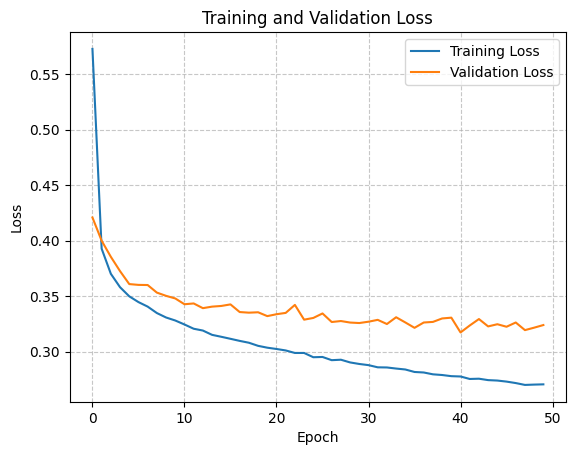

In [66]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(alpha=0.7, linestyle='--')
plt.show()

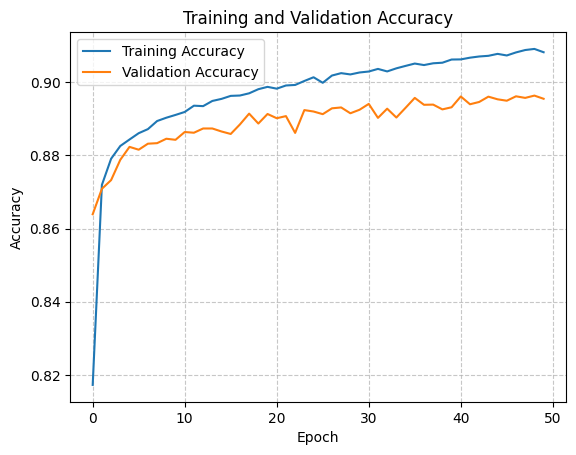

1386/1386 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step


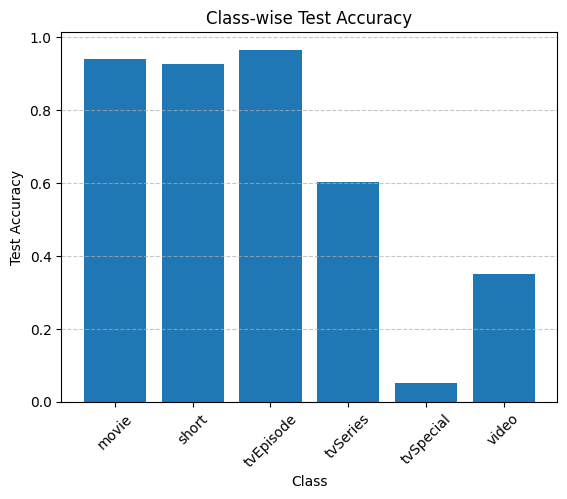

In [67]:
from sklearn.metrics import accuracy_score

# Plot overall accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(alpha=0.7, linestyle='--')
plt.show()

# Class-wise accuracy on test set

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Calculate accuracy for each class
class_accuracies = {}
for i, class_name in enumerate(le.classes_):
    idx = (y_test == i)
    class_acc = accuracy_score(y_test[idx], y_pred_classes[idx])
    class_accuracies[class_name] = class_acc

# Plot class-wise accuracy
plt.bar(class_accuracies.keys(), class_accuracies.values())
plt.xlabel('Class')
plt.ylabel('Test Accuracy')
plt.title('Class-wise Test Accuracy')
plt.xticks(rotation=45)
plt.grid(alpha=0.7, linestyle='--', axis='y')
plt.show()

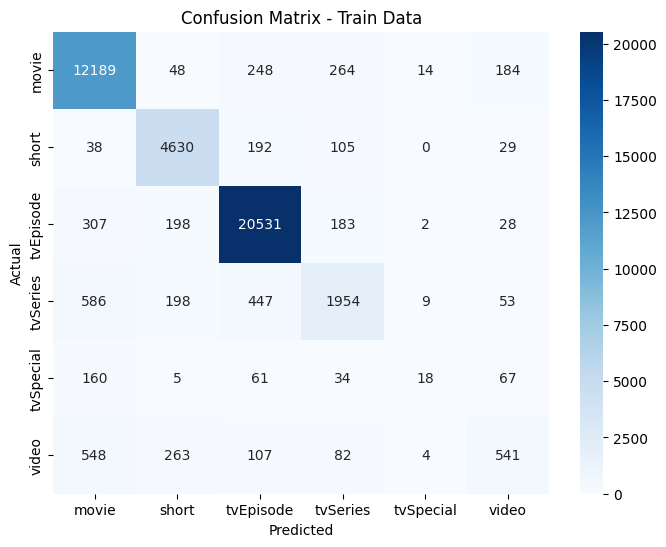

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm_train = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Train Data')
plt.show()

In [69]:
from sklearn.metrics import classification_report

# Macro scores
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))

              precision    recall  f1-score   support

       movie       0.88      0.94      0.91     12947
       short       0.87      0.93      0.90      4994
   tvEpisode       0.95      0.97      0.96     21249
    tvSeries       0.75      0.60      0.67      3247
   tvSpecial       0.38      0.05      0.09       345
       video       0.60      0.35      0.44      1545

    accuracy                           0.90     44327
   macro avg       0.74      0.64      0.66     44327
weighted avg       0.89      0.90      0.89     44327



1386/1386 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step
1386/1386 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step
1386/1386 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step
1386/1386 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step
1386/1386 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step
1386/1386 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step


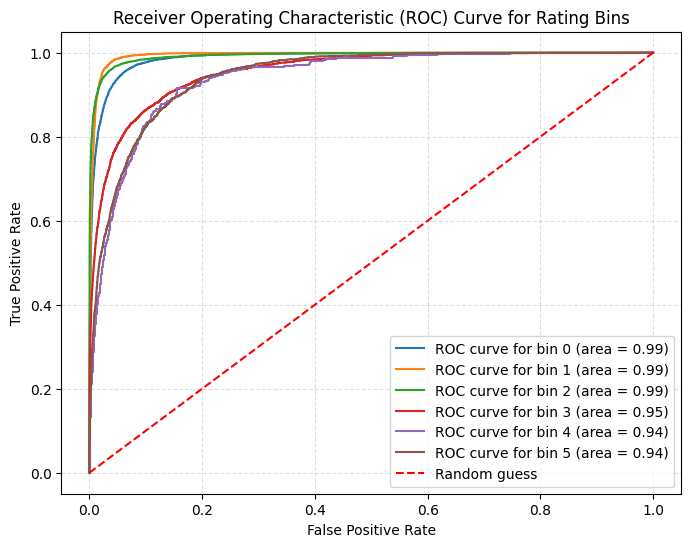

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve for each rating bin
fpr = {}
tpr = {}
roc_auc = {}
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, model.predict(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(8, 6))
for i in range(6):
    plt.plot(fpr[i], tpr[i], label='ROC curve for bin {} (area = {:.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.title('Receiver Operating Characteristic (ROC) Curve for Rating Bins')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(linestyle='--', alpha=0.4)
plt.show()

# Rating

In [102]:
train = pd.read_csv('dm2_dataset_2425_imdb/train70_clf.csv')
test = pd.read_csv('dm2_dataset_2425_imdb/test30_clf.csv')

In [103]:
X_train = train.drop(columns=['averageRating', 'canHaveEpisodes'])
y_train = train['averageRating']

X_test = test.drop(columns=['averageRating', 'canHaveEpisodes'])
y_test = test['averageRating']

# One hot encode the titleType column
X_train = pd.get_dummies(X_train, columns=['titleType'], drop_first=True, dtype=int)
X_test = pd.get_dummies(X_test, columns=['titleType'], drop_first=True, dtype=int)

# X_train = X_train[[
#     'startYear', 'runtimeMinutes', 'numRegions',
#     'ratingCount', 'companiesNumber', 'totalNominations',
#     'totalMedia', 'totalReviews',
#     'South America', 'Australia',
#     'genre1', 'genre2', 'genre3',
#     'deltaCredits', 'titleType_short', 'titleType_tvEpisode',
#     # 'Africa', 'titleType_tvSpecial', 'titleType_video',
#     # 'Asia', 'Continent Unknown', 'North America',
#     # 'titleType_tvSeries', 'Europe',
# ]]

# X_test = X_test[[
#     'startYear', 'runtimeMinutes', 'numRegions',
#     'ratingCount', 'companiesNumber', 'totalNominations',
#     'totalMedia', 'totalReviews',
#     'South America', 'Australia',
#     'genre1', 'genre2', 'genre3',
#     'deltaCredits', 'titleType_short', 'titleType_tvEpisode',
#     # 'Africa', 'titleType_tvSpecial', 'titleType_video',
#     # 'Asia', 'Continent Unknown', 'North America',
#     # 'titleType_tvSeries', 'Europe',
# ]]

In [104]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

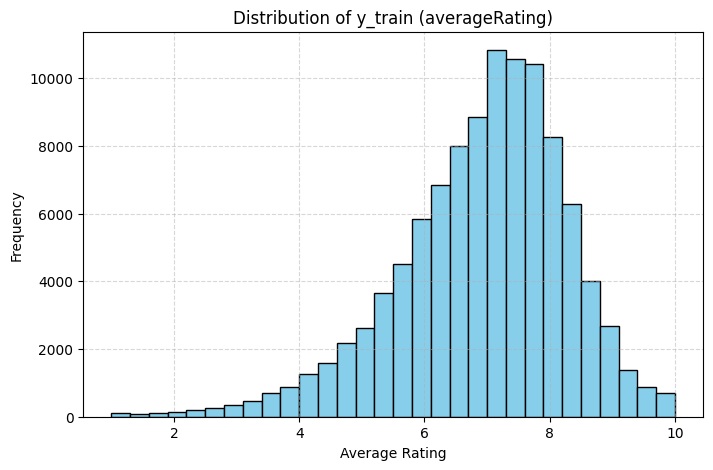

In [105]:
# 0-6
# 6-7
# 7-8
# 8-9
# 9-10

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(y_train, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of y_train (averageRating)')
plt.grid(alpha=0.5, linestyle='--')
plt.show()

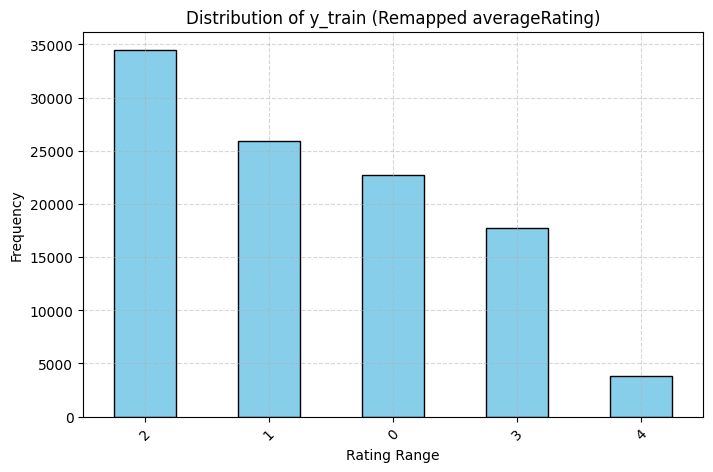

In [106]:
# Map values in intervals to new  bins
def remap_rating(rating):
    if rating < 6:
        return 0
    elif 6 <= rating < 7:
        return 1
    elif 7 <= rating < 8:
        return 2
    elif 8 <= rating < 9:
        return 3
    else:
        return 4

# Remap y_train and y_test
y_train = y_train.map(remap_rating)
y_test = y_test.map(remap_rating)

y_train, y_test

# Barplot the new distribution
plt.figure(figsize=(8, 5))
y_train.value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Rating Range')
plt.ylabel('Frequency')
plt.title('Distribution of y_train (Remapped averageRating)')
plt.xticks(rotation=45)
plt.grid(alpha=0.5, linestyle='--')
plt.show()

In [107]:
# Counts for each class
y_train.value_counts().sort_index()

averageRating
0    22715
1    25918
2    34490
3    17774
4     3774
Name: count, dtype: int64

In [108]:
# X_train = X_train.reset_index(drop=True)
# y_train = y_train.reset_index(drop=True)

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import CategoricalCrossentropy
import tensorflow as tf

# Neural network for remapped y (averageRating bins)
model_rating = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    # Dense(8, activation='relu'),
    Dense(5, activation='softmax')
])

model_rating.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3020 - loss: 1.5016 - val_accuracy: 0.3557 - val_loss: 1.4027
Epoch 2/100
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3359 - loss: 1.4024 - val_accuracy: 0.3489 - val_loss: 1.4192
Epoch 3/100
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3350 - loss: 1.3937 - val_accuracy: 0.3362 - val_loss: 1.4220
Epoch 4/100
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3416 - loss: 1.3781 - val_accuracy: 0.3086 - val_loss: 1.4535
Epoch 5/100
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3460 - loss: 1.3695 - val_accuracy: 0.3403 - val_loss: 1.4240
Epoch 6/100
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3455 - loss: 1.3773 - val_accuracy: 0.3420 - val_loss: 1.4012
Epoch 7/100
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3442 - loss: 1.3672 - val_accuracy: 0.3535 - val_loss: 1.3935
Epoch 8/100
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3500 - loss: 1

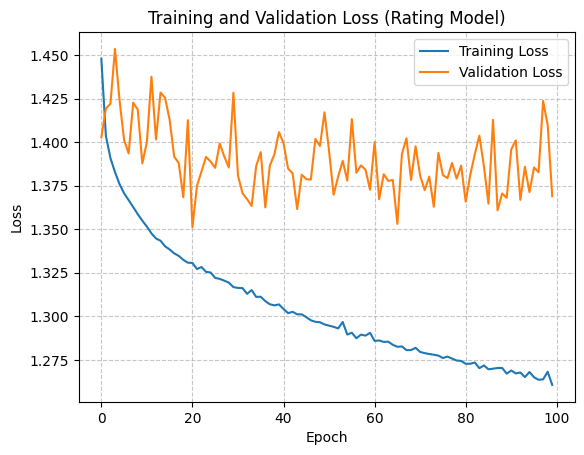

In [110]:
# Compute class weights to handle imbalance
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Class weight options: 'balanced', None, or custom dict

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)


history_rating = model_rating.fit(
    X_train, y_train,
    epochs=100, batch_size=64, validation_split=0.2,
    class_weight={i: w for i, w in enumerate(class_weights)}
)

plt.plot(history_rating.history['loss'], label='Training Loss')
plt.plot(history_rating.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Rating Model)')
plt.legend()
plt.grid(alpha=0.7, linestyle='--')
plt.show()

In [111]:
class_weights

array([0.92160247, 0.80770893, 0.60696434, 1.17779903, 5.54695284])

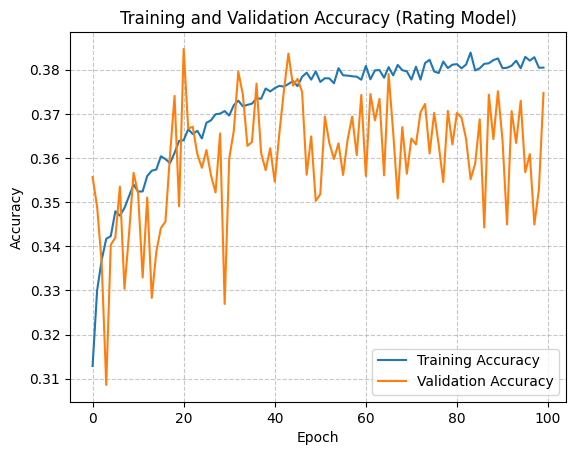

In [112]:
plt.plot(history_rating.history['accuracy'], label='Training Accuracy')
plt.plot(history_rating.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (Rating Model)')
plt.legend()
plt.grid(alpha=0.7, linestyle='--')
plt.show()

1402/1402 ━━━━━━━━━━━━━━━━━━━━ 1s 847us/step
              precision    recall  f1-score   support

           0       0.51      0.54      0.52      9717
           1       0.40      0.27      0.32     11114
           2       0.51      0.35      0.41     14674
           3       0.29      0.34      0.31      7640
           4       0.12      0.55      0.20      1715

    accuracy                           0.38     44860
   macro avg       0.36      0.41      0.35     44860
weighted avg       0.43      0.38      0.39     44860



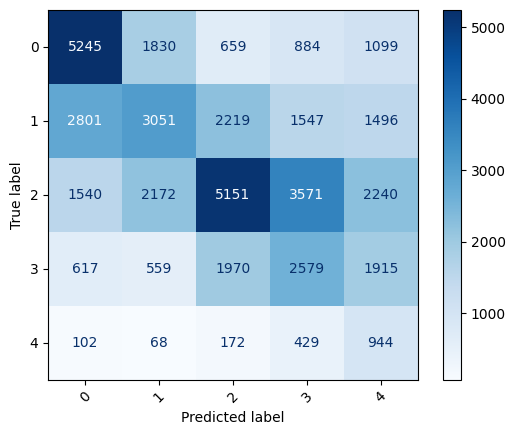

In [113]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = model_rating.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Print classification report
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_classes, cmap='Blues', xticks_rotation=45)
plt.show()

1402/1402 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step
1402/1402 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step
1402/1402 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step
1402/1402 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step
1402/1402 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step


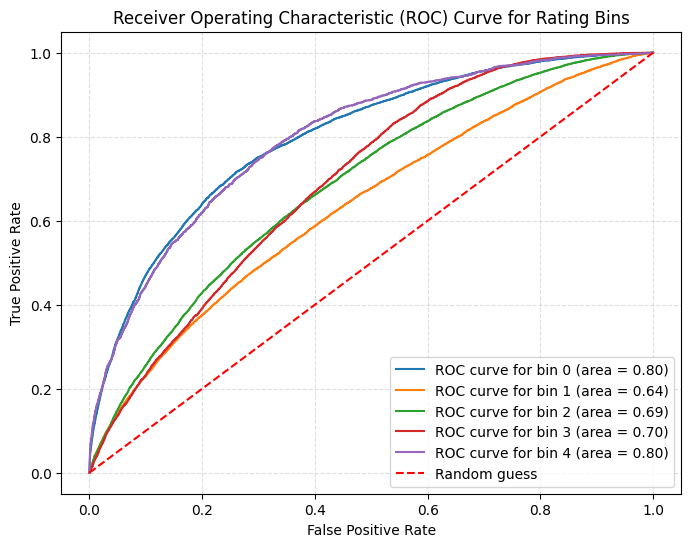

In [114]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve for each rating bin
fpr = {}
tpr = {}
roc_auc = {}
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, model_rating.predict(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='ROC curve for bin {} (area = {:.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.title('Receiver Operating Characteristic (ROC) Curve for Rating Bins')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(linestyle='--', alpha=0.4)
plt.show()